In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras

# Intrusion Detection Evaluation Dataset (CIC-IDS2017)
### Web Attack Data

Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Due to the lack of reliable test and validation datasets, anomaly-based intrusion detection approaches are suffering from consistent and accurate performance evolutions.

[https://www.unb.ca/cic/datasets/ids-2017.html]


In [2]:
# Load Data
df = pd.read_csv("data/CICIDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
X = df

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean       170366 non-nul

In [4]:
X[' Label'].unique()

array(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'], dtype=object)

In [6]:
X.replace('BENIGN', 0, inplace=True)
X.replace('Web Attack � Brute Force', 1, inplace=True)
X.replace('Web Attack � XSS', 1, inplace=True)
X.replace('Web Attack � Sql Injection', 1, inplace=True)

In [7]:
X[' Label'].unique()

array([0, 1])

In [8]:
# Clean Data
if(np.any(np.isnan(X)) or np.all(np.isfinite(X))):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep]

X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,0
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,0
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,0
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702162,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [11]:
# Scale Data
scaled_features = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.005936,0.942462,0.000234,0.000089,0.008076,1.596810e-05,0.017252,0.000000,0.048151,0.037256,...,0.533333,0.001980,0.009040,0.015817,3.679612e-06,0.115000,0.058919,0.137500,0.056147,0.0
1,0.005936,0.945614,0.000334,0.000148,0.009492,2.028389e-05,0.017252,0.000000,0.039951,0.031467,...,0.533333,0.001731,0.007903,0.013828,3.155340e-06,0.115000,0.058256,0.137500,0.057879,0.0
2,0.000000,0.999546,0.000742,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067085,0.183673,0.198058,5.825243e-08,0.203333,0.334711,0.500833,0.047518,0.0
3,0.006760,0.502183,0.000040,0.000026,0.001946,6.732057e-06,0.046789,0.000000,0.061890,0.074989,...,0.333333,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000809,0.000002,0.000005,0.000007,0.000085,5.135566e-07,0.002183,0.029497,0.012192,0.000000,...,0.533333,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
y_label = X.pop(' Label')
y_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name:  Label, dtype: float64

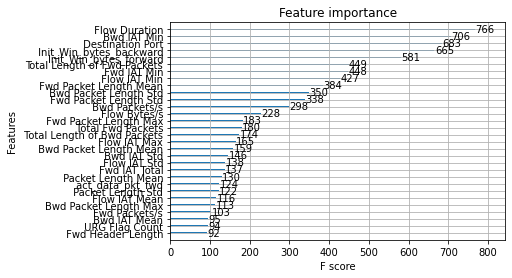

In [13]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt

mod = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 5, n_estimators = 600)
mod.fit(X, y_label)
plot_importance(mod, max_num_features=30)
plt.show()

In [14]:
# Important Features
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the regressor
reg.fit(X, y_label)

x = {}
# Print the name and gini importance of each feature
for feature in zip(list(X.columns), reg.feature_importances_):
    print(feature)
    x[feature[0]] = feature[1]

(' Destination Port', 0.023049596100839696)
(' Flow Duration', 0.00024471330591849315)
(' Total Fwd Packets', 0.0004414773600633668)
(' Total Backward Packets', 0.00016537002151662062)
('Total Length of Fwd Packets', 0.009451461220291653)
(' Total Length of Bwd Packets', 0.0007869039991864476)
(' Fwd Packet Length Max', 0.002292891091876243)
(' Fwd Packet Length Min', 6.059926224473691e-06)
(' Fwd Packet Length Mean', 0.00337665306387991)
(' Fwd Packet Length Std', 0.010522365813662067)
('Bwd Packet Length Max', 0.0010011440809621094)
(' Bwd Packet Length Min', 7.374468416764751e-06)
(' Bwd Packet Length Mean', 0.00043738314566909344)
(' Bwd Packet Length Std', 0.002218070585360001)
('Flow Bytes/s', 0.0002096000487616311)
(' Flow Packets/s', 0.00035978018923798084)
(' Flow IAT Mean', 0.00020864822189381503)
(' Flow IAT Std', 0.000553235601710361)
(' Flow IAT Max', 0.001707255046245638)
(' Flow IAT Min', 0.0003474661629334669)
('Fwd IAT Total', 0.000546368338730663)
(' Fwd IAT Mean', 0.

In [15]:
# Create training & testing datasets
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# Confusion Matrix
# Precision & Recall
# plot num of bins vs. accuracy, against no bin approach
# Use other datasets

# Using Machine Learning to predict Web attacks
created two different classification models, a Support Vector Machine (SVM) and Multilayer Perceptron (MLP) neural network. 
These models will be used as baselines for validating the discretization of the features.

**SVM accuracy score: 99.8%**

**MLP accuracy score: 99.9%**

In [16]:
# Support Vector Machine
from sklearn.svm import LinearSVC
linear_SVC = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    linear_SVC.fit(X_train[train], y_train[train])
    accuracy = linear_SVC.score(X_test[test], y_test[test])
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')
  #  display = PrecisionRecallDisplay.from_estimator(linear_SVC, X_test[test], y_test[test], name="LinearSVC")   
  #  _ = display.ax_.set_title("2-class Precision-Recall curve")

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Accuracy Score: 0.9928040649690134,
 Confusion Matrix:
[[33341   126]
 [  119   461]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [34047 34048 34049 ... 68090 68091 68092],
 Accuracy Score: 0.9900722551841626,
 Confusion Matrix:
[[32959   160]
 [  178   749]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 Accuracy Score: 0.9941843388356929,
 Confusion Matrix:
[[33231   142]
 [   56   617]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 Accuracy Score: 0.9941843388356929,
 Confusion Matrix:
[[33848   198]
 [    0     0]]

train: [     0      1      2 ... 136182 136183 136184],
 test: [136185 136186 136187 ... 170228 170229 170230],
 Accuracy Score: 0.9936850143922927,
 Confusion Matrix:
[[33831   215]
 [    0     0]]



In [17]:
# MLP Neural Net
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    mlp_clf.fit(X_train[train], y_train[train])
    accuracy = mlp_clf.score(X_test[test], y_test[test])
    loss = mlp_clf.loss_
    print(f'train: {train},\n test: {test},\n Loss: {loss},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Loss: 0.008579295095845306,
 Accuracy Score: 0.9975328222750903,
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [34047 34048 34049 ... 68090 68091 68092],
 Loss: 0.008176930599738653,
 Accuracy Score: 0.9957116841919755,
 Confusion Matrix:
[[32925   194]
 [  132   795]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 Loss: 0.007877671120896532,
 Accuracy Score: 0.9966515890266111,
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 Loss: 0.00923329551316688,
 Accuracy Score: 0.9971509134700112,
 Confusion Matrix:
[[33848   198]
 [    0     0]]

train: [     0      1      2 ... 136182 136183 136184],
 test: [136185 136186 136187 ... 170228 1

# Discretized Dataset
Discretize the same dataset, and run the same models to validate that the predicts can still be acheived using discretized data.

### Bin=5

**SVM accuracy score: 99.8%**

**MLP accuracy score: 98.7%**

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer

discrete5 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discrete10 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discrete15 = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
discrete20 = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
discrete25 = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')

svm_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}
mlp_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

In [19]:
# SVM 5 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Accuracy Score: 0.9811730842658678,
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 Accuracy Score: 0.9947130353051753,
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [20]:
svm_bin_accuracy

{'5bins': 0.9947130353051753,
 '10bins': 0,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

In [21]:
# MLP Neural Net 5 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 layer size: (100,),
 Loss: 0.014834768806323615,
 Accuracy Score: 0.9940376538314682
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 layer size: (100,),
 Loss: 0.0151189527464396,
 Accuracy Score: 0.9953885919050696
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 layer size: (100,),
 Loss: 0.017565818463549848,
 Accuracy Score: 0.9967397051048581
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [22]:
mlp_bin_accuracy

{'5bins': 0.9967397051048581,
 '10bins': 0,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 10

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.84**

In [23]:
# SVM 10bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Accuracy Score: 0.9925397244984874,
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 Accuracy Score: 0.9931563179228103,
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 Accuracy Score: 0.9943018269400223,
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [24]:
svm_bin_accuracy

{'5bins': 0.9947130353051753,
 '10bins': 0.9943018269400223,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

In [25]:
# MLP Neural Net 10 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 layer size: (100,),
 Loss: 0.013755684512569859,
 Accuracy Score: 0.9949775310600053
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 layer size: (100,),
 Loss: 0.013634097354949646,
 Accuracy Score: 0.9954767079833167
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 layer size: (100,),
 Loss: 0.015998042494130862,
 Accuracy Score: 0.9967397051048581
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [26]:
mlp_bin_accuracy

{'5bins': 0.9967397051048581,
 '10bins': 0.9967397051048581,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 15

 **SVM Accuracy: 99.85**

**MLP Accuracy: 99.88**

In [27]:
# SVM 15 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Accuracy Score: 0.9932740035832819,
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 Accuracy Score: 0.9933031780532221,
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 Accuracy Score: 0.9940668507313635,
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [28]:
svm_bin_accuracy

{'5bins': 0.9947130353051753,
 '10bins': 0.9943018269400223,
 '15bins': 0.9940668507313635,
 '20bins': 0,
 '25bins': 0}

In [29]:
# MLP Neural Net 15 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 layer size: (100,),
 Loss: 0.012734319676607707,
 Accuracy Score: 0.995564954327841
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 layer size: (100,),
 Loss: 0.014452897374134908,
 Accuracy Score: 0.9967397051048581
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [30]:
mlp_bin_accuracy

{'5bins': 0.9967397051048581,
 '10bins': 0.9967397051048581,
 '15bins': 0.9967397051048581,
 '20bins': 0,
 '25bins': 0}

### Bins = 20

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.85**

In [31]:
# SVM 20 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Accuracy Score: 0.9849619643434077,
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 Accuracy Score: 0.9940668507313635,
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 136182 136183 136184],
 test: [136185 136186 136187 ... 170228 170229 170230],
 Accuracy Score: 0.9945955472008459,
 Confusion Matrix:
[[33831   215]
 [    0     0]]



In [32]:
svm_bin_accuracy

{'5bins': 0.9947130353051753,
 '10bins': 0.9943018269400223,
 '15bins': 0.9940668507313635,
 '20bins': 0.9945955472008459,
 '25bins': 0}

In [33]:
# MLP Neural Net 20 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 layer size: (100,),
 Loss: 0.011674984179623359,
 Accuracy Score: 0.995829294798367
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 layer size: (100,),
 Loss: 0.013234652236082974,
 Accuracy Score: 0.9970921694178464
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [34]:
mlp_bin_accuracy

{'5bins': 0.9967397051048581,
 '10bins': 0.9967397051048581,
 '15bins': 0.9967397051048581,
 '20bins': 0.9970921694178464,
 '25bins': 0}

### Bins = 25

 **SVM Accuracy: 99.82**

**MLP Accuracy: 99.87**

In [35]:
# SVM 25 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 Accuracy Score: 0.9937439421975505,
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [ 68093  68094  68095 ... 102136 102137 102138],
 Accuracy Score: 0.9955354520354814,
 Confusion Matrix:
[[33214   159]
 [   53   620]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 Accuracy Score: 0.9964166128179521,
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [36]:
svm_bin_accuracy

{'5bins': 0.9947130353051753,
 '10bins': 0.9943018269400223,
 '15bins': 0.9940668507313635,
 '20bins': 0.9945955472008459,
 '25bins': 0.9964166128179521}

In [37]:
# MLP Neural Net 25 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 34047  34048  34049 ... 170228 170229 170230],
 test: [    0     1     2 ... 34044 34045 34046],
 layer size: (100,),
 Loss: 0.011299023648823419,
 Accuracy Score: 0.9961230064322848
 Confusion Matrix:
[[33331   136]
 [   91   489]]

train: [     0      1      2 ... 170228 170229 170230],
 test: [102139 102140 102141 ... 136182 136183 136184],
 layer size: (100,),
 Loss: 0.011825985774327053,
 Accuracy Score: 0.99738588967867
 Confusion Matrix:
[[33848   198]
 [    0     0]]



In [38]:
mlp_bin_accuracy

{'5bins': 0.9967397051048581,
 '10bins': 0.9967397051048581,
 '15bins': 0.9967397051048581,
 '20bins': 0.9970921694178464,
 '25bins': 0.99738588967867}